### ***Importing Python Libraries***

In [1]:
# Importing Libraries
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

***Loading Dataset***

In [2]:
# Reading Data
df = pd.read_csv('GCB2022v27_MtCO2_flat.csv')

***Data Preprocessing***

In [3]:
# Preprocessing and Setting Index
#dropping years less than 1950
df.drop(df[df['Year'] < 1950].index, inplace = True)

In [4]:
# Handling Missing Values (Filling NaN with Mean)
df = df.fillna(df.mean())


In [5]:
#checking the columns
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [6]:
#converting countries to list
countries=list(df["Country"].unique())

In [7]:
columns_to_drop = ['Coal', 'Cement', 'Flaring', 'Other']
df = df.drop(columns=columns_to_drop)


In [8]:
df.shape

(16704, 7)

In [9]:
missing_columns= ['Oil', 'Gas']
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Oil                   float64
Gas                   float64
Per Capita            float64
dtype: object

In [10]:
#Getting the mean of Each country

oil_mean=df.groupby('Country')['Oil'].mean()
gas_mean=df.groupby('Country')['Gas'].mean()
per_capita_mean= df.groupby('Country')['Per Capita'].mean()



In [11]:
#Setting the Index

oil_mean.index = countries
gas_mean.index = countries
per_capita_mean.index = countries

In [12]:
#Converting to Dictionary

oil_mean=oil_mean.to_dict()
gas_mean=gas_mean.to_dict()
per_capita_mean= per_capita_mean.to_dict()

In [13]:
#fillin missing values with the mean of that country and the type of fuel
df.Oil = df.Oil.fillna(df.Country.map(oil_mean))
df.Gas = df.Gas.fillna(df.Country.map(gas_mean))
df['Per Capita'].fillna(df.Country.map(per_capita_mean), inplace=True)

<Axes: >

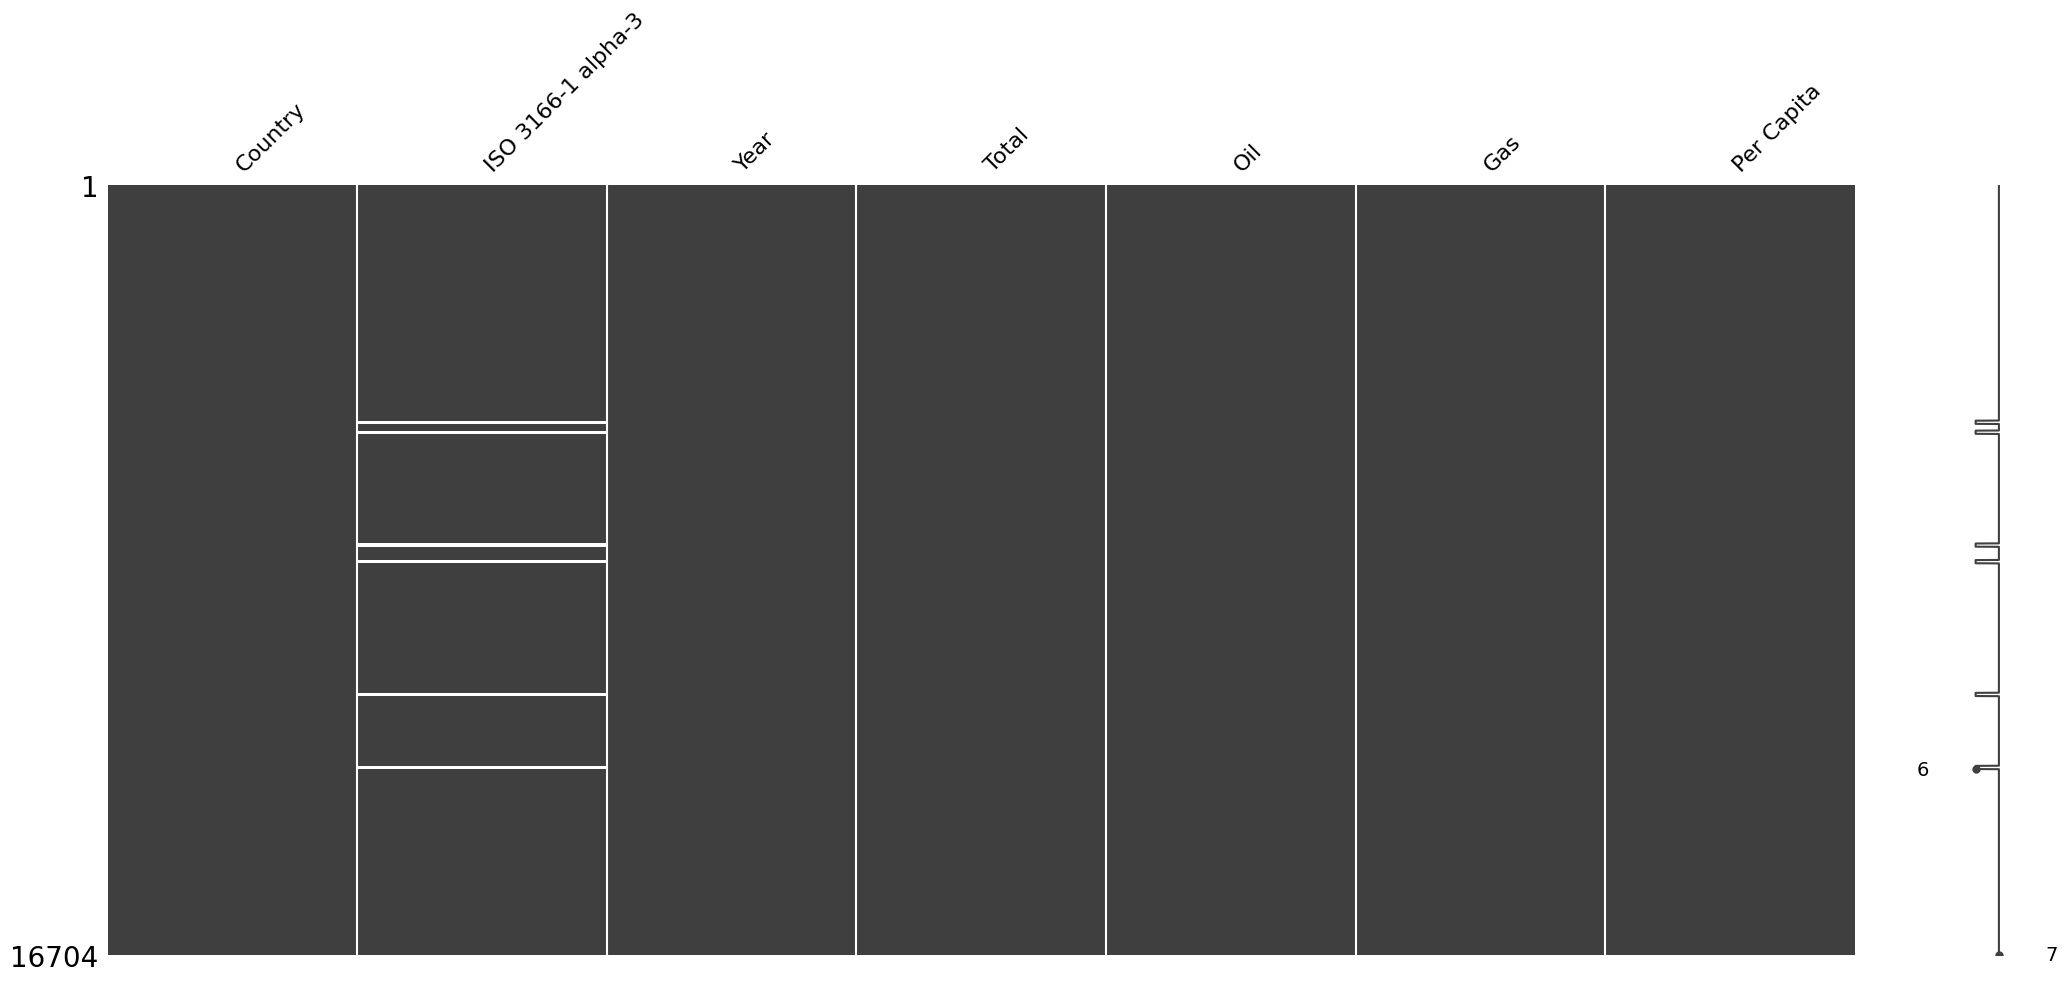

In [14]:
msno.matrix(df)

In [15]:
df

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Per Capita
200,Afghanistan,AFG,1950,0.084272,0.063204,0.000000,0.011266
201,Afghanistan,AFG,1951,0.091600,0.065952,0.000000,0.012098
202,Afghanistan,AFG,1952,0.091600,0.059892,0.000000,0.011946
203,Afghanistan,AFG,1953,0.106256,0.068307,0.000000,0.013685
204,Afghanistan,AFG,1954,0.106256,0.063754,0.000000,0.013511
...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739280,12242.627940,7144.928128,4.749682
63100,Global,WLD,2018,36826.506600,12266.016290,7529.846784,4.792753
63101,Global,WLD,2019,37082.558970,12345.653370,7647.528220,4.775633
63102,Global,WLD,2020,35264.085730,11191.808550,7556.290283,4.497423


In [16]:
df.isna().sum()

Country                 0
ISO 3166-1 alpha-3    432
Year                    0
Total                   0
Oil                     0
Gas                     0
Per Capita              0
dtype: int64

In [17]:
#removing the values of the world
glob= df[df['ISO 3166-1 alpha-3'] == 'WLD']

In [18]:
#droppin missing iso values columns
df.drop(df[df['ISO 3166-1 alpha-3'] == 'WLD'].index, inplace = True)

In [19]:
#top 100 countries in each fuel category
Oil_mean=df.groupby(['ISO 3166-1 alpha-3','Country'])['Oil'].mean().sort_values(ascending=False)[0:100].reset_index()
Gas_mean=df.groupby(['ISO 3166-1 alpha-3','Country'])['Gas'].mean().sort_values(ascending=False)[0:100].reset_index()
Total_mean=df.groupby(['ISO 3166-1 alpha-3','Country'])['Total'].mean().sort_values(ascending=False)[0:100].reset_index()


In [20]:
categories=['Oil', 'Gas','Total']
len(categories)

3

In [21]:
df_cat= ['Oil_mean','Gas_mean','Total_mean']

# ***Exploratory Data Analysis (EDA)***

In [22]:
def chlorepath(data,color):
    fig=px.choropleth(data, locations="ISO 3166-1 alpha-3",
                    color= color,
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
    fig.show()

In [23]:
#getting the top 10 countries in each category
Oil_mean_10=df.groupby(['ISO 3166-1 alpha-3','Country'])['Oil'].mean().sort_values(ascending=False)[0:10].reset_index()
Gas_mean_10=df.groupby(['ISO 3166-1 alpha-3','Country'])['Gas'].mean().sort_values(ascending=False)[0:10].reset_index()

Total_mean_10=df.groupby(['ISO 3166-1 alpha-3','Country'])['Total'].mean().sort_values(ascending=False)[0:10].reset_index()
Per_Capita_mean_10=df.groupby(['ISO 3166-1 alpha-3','Country'])['Per Capita'].mean().sort_values(ascending=False)[0:10].reset_index()
Year_mean_10_pc=df.groupby(['Year'])['Per Capita'].mean().sort_values(ascending=False)[0:10].reset_index()
Year_mean_10_total=df.groupby(['Year'])['Total'].mean().sort_values(ascending=False)[0:10].reset_index()

In [24]:
fig2= px.pie(Oil_mean_10,values='Oil',names='Country',title= " Top 10 Countries by Oil Emission")
fig2.show()

In [25]:
fig2= px.pie(Gas_mean_10,values='Gas',names='Country',title= " Top 10 Countries by Gas Emission")
fig2.show()

In [26]:
fig8= px.pie(Year_mean_10_pc,values='Per Capita',names='Year',title= "Top 10 Years of Highest Per Capita Emission")
fig8.show()


In [27]:
fig9= px.pie(Year_mean_10_total,values='Total',names='Year',title= "Top 10 Years of Highest Total Emission")
fig9.show()


In [28]:
#top 100 countries by Oil Emission
fig11= chlorepath(Oil_mean,'Oil')

"""# Chlorepath of top 100 countries by Gas Emission"""

#top 100 countries by Gas Emission
fig12= chlorepath(Gas_mean,'Gas')

"""# Chlorepath of top 100 countries by Total Emission"""

#top 100 countries by Total Emission
fig13=chlorepath(Total_mean,'Total')

"""# Chlorepath of top 100 countries by Per Capita Emission"""

#top 100 countries by Per Capita Emission
fig14=chlorepath(Per_Capita_mean_10,'Per Capita')

# `***Machine Learning Modeling***





**Trend Plot**

In [29]:

"""# Trend Plot of Per Capita Emission over the years"""

Year_mean_trend_pc=df.groupby(['Year'])['Per Capita'].mean().reset_index()
Year_mean_trend_total=df.groupby(['Year'])['Total'].mean().reset_index()

#trend of total emission over the years
fig15 = px.line(Year_mean_trend_pc, x="Year", y="Per Capita")
fig15.update_xaxes(rangeslider_visible=True)
fig15.show()

**Range Slider**

In [30]:

"""**Use the range slider to zoom through the respective years of intrest**"""

#trend of per capita emission over the years
fig16 = px.line(Year_mean_trend_total, x="Year", y="Total")
fig16.update_xaxes(rangeslider_visible=True)
fig16.show()

<Axes: >

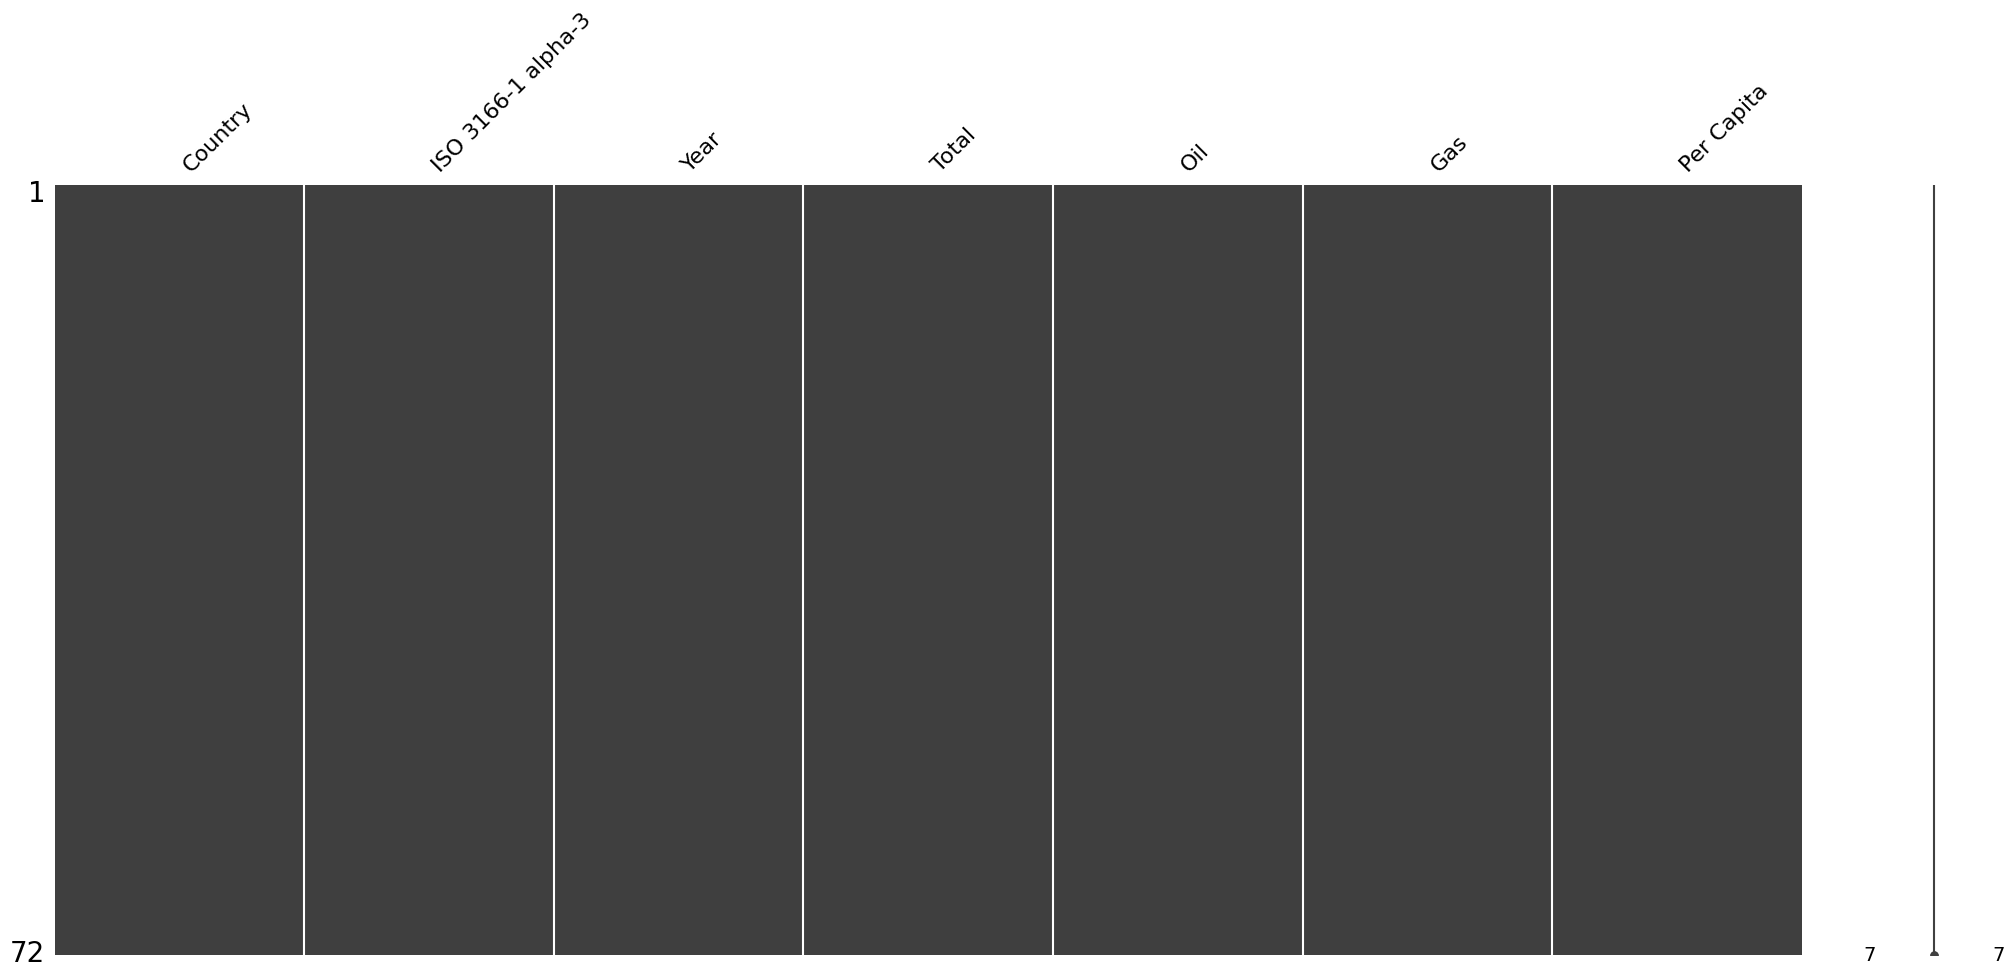

In [31]:
"""# MODEL BUILDING- TIME SERIES"""

#checking the missing values in the glob data
msno.matrix(glob)

In [32]:
#checking the columns
glob.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Oil', 'Gas',
       'Per Capita'],
      dtype='object')

In [33]:
#checking the types of data in the columns
glob.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Oil                   float64
Gas                   float64
Per Capita            float64
dtype: object

In [34]:
glob.sample(5)

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Per Capita
63069,Global,WLD,1987,21273.904180,8654.658723,3305.280002,4.220188
63043,Global,WLD,1961,9418.459819,3313.503284,882.006900,3.069531
63085,Global,WLD,2003,27651.596450,10679.654450,5081.468111,4.324685
63093,Global,WLD,2011,34487.011620,11388.085510,6366.902202,4.875781
63100,Global,WLD,2018,36826.506600,12266.016290,7529.846784,4.792753


In [35]:
#setting year as the index for the dataframe
glob.index= glob.Year
glob.sample(5)

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Per Capita
Year,,,,,,,
1987,Global,WLD,1987,21273.90418,8654.658723,3305.280002,4.220188
1988,Global,WLD,1988,22107.79498,8972.672132,3466.022378,4.307585
2007,Global,WLD,2007,31506.78920,11283.665340,5694.133805,4.684364
2009,Global,WLD,2009,31564.03069,10996.948680,5751.954007,4.575621
2019,Global,WLD,2019,37082.55897,12345.653370,7647.528220,4.775633


In [36]:
#dropping the irrelevant columns
glob.drop(['ISO 3166-1 alpha-3','Year','Country'], axis=1, inplace=True)

glob.sample(5)

,Total,Oil,Gas,Per Capita
Year,,,,
1969,13767.39887,5980.508947,1708.517527,3.802461
2011,34487.01162,11388.085510,6366.902202,4.875781
1990,22757.48050,9249.362779,3833.133407,4.280799
1968,12910.89193,5530.292697,1559.571153,3.640141
1982,18884.48701,8345.175954,2731.273279,4.098209


In [37]:
#checking the shape of the data
glob.shape

(72, 4)

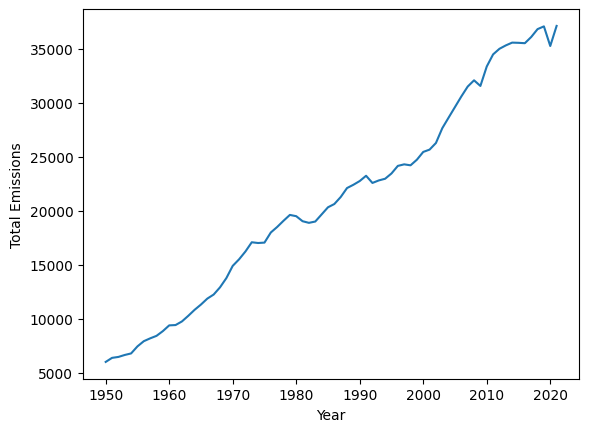

In [38]:

#selecting only total column
glob_total= glob.iloc[:, :1]
glob_total

plt.plot(glob_total)
plt.ylabel("Total Emissions")
plt.xlabel("Year")
plt.show()

**Dicky Fuller Test**

In [39]:
#performing dicky fuller test to check if the data is covariance stationery
for i in range(1,13,1):
    adf = st.adfuller(x=glob_total, regression="ct", maxlag=i)
    print("adf:", adf[0], "adf_pvalue:", adf[1])

adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -2.0012428315172373 adf_pvalue: 0.6007565743977246
adf: -3.2421193028095665 adf_pvalue: 0.07633086896963374
adf: -3.2421193028095665 adf_pvalue: 0.07633086896963374


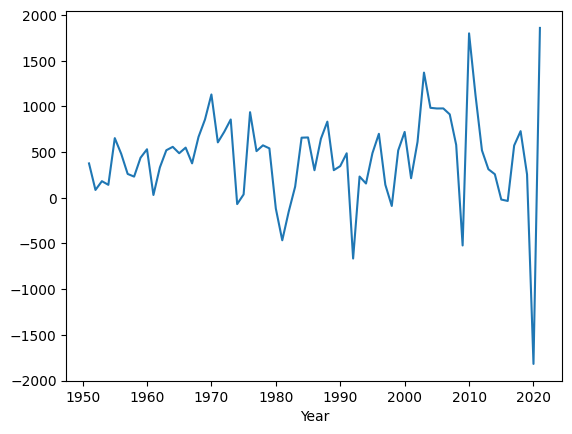

In [40]:

"""**Inference:-Time series is not covariance stationery, the p value is greater than 5%.
A time series can be applied only to covariance stationery time series**

# Making Data Covariance Stationery
"""

#shifting the data by 1 period and checking the distribution
glob_total['total_diff'] = glob_total['Total'] - glob_total['Total'].shift(1)

#Visaulaising the Distribution
glob_total['total_diff'].dropna().plot()

glob_total.head()

glob_total_temp= glob_total[['total_diff']]
glob_total_temp.dropna(inplace=True)

In [41]:

#performing dicky fuller test to check if the data is covariance stationery

for i in range(1,13,1):
    adf = st.adfuller(x=glob_total_temp, regression="ct", maxlag=i)
    print("lag:", i,"adf:", adf[0], "adf_pvalue:", adf[1])

lag: 1 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 2 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 3 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 4 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 5 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 6 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 7 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 8 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 9 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 10 adf: -7.493103053308627 adf_pvalue: 1.0570707885628824e-09
lag: 11 adf: -2.6480127537658324 adf_pvalue: 0.2582950907015302
lag: 12 adf: -3.0225537235999234 adf_pvalue: 0.1258842589703248


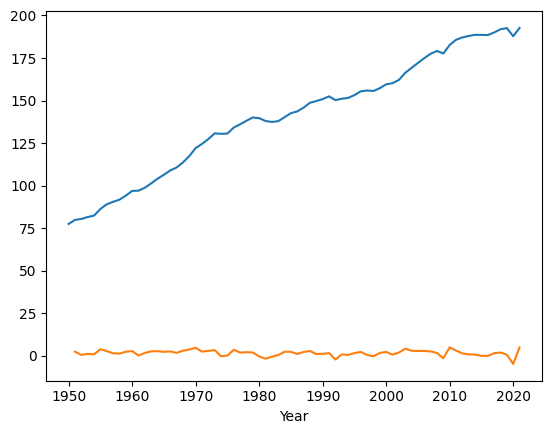

In [42]:

"""**Inference:-Time series is not covariance stationery, the p value is greater than 5%**"""

# Calculate the square root
glob_total['adj_sqrt'] = np.sqrt(glob_total['Total'])

# Visualizing the data
glob_total['adj_sqrt'].dropna().plot()

# Square root difference by 1 period
glob_total['adj_sqrt_diff'] = glob_total['adj_sqrt'] - glob_total['adj_sqrt'].shift(1)
glob_total['adj_sqrt_diff'].dropna().plot()

glob_total_temp1= glob_total[['adj_sqrt_diff']]
glob_total_temp1.dropna(inplace=True)

In [43]:

#performing dicky fuller test to check if the data is covariance stationery
for i in range(1,13,1):
    adf = st.adfuller(x=glob_total_temp1, regression="ct", maxlag=i)
    print("lag:", i,"adf:", adf[0], "adf_pvalue:", adf[1])

lag: 1 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 2 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 3 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 4 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 5 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 6 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 7 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 8 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 9 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 10 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 11 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08
lag: 12 adf: -6.958804625256444 adf_pvalue: 1.750886365010285e-08


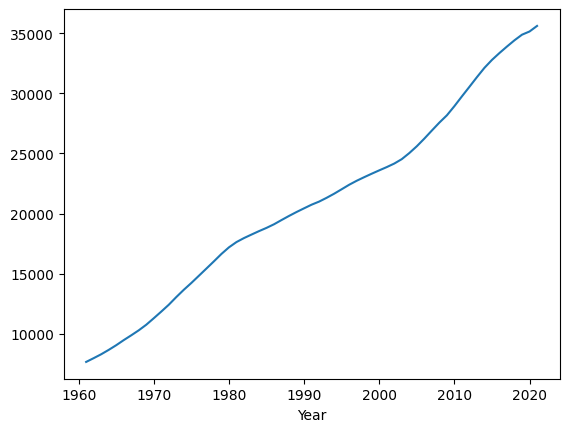

In [44]:

"""**Inference:-Time series is not covariance stationery, the p value is greater than 5%**"""

# Calculating rolling mean
glob_total['roll12'] = glob_total['Total'].rolling(window = 12).mean()

#visualizing the data
glob_total['roll12'].dropna().plot()

glob_total_temp2= glob_total[['roll12']]
glob_total_temp2.dropna(inplace=True)

In [45]:


#performing dicky fuller test to check if the data is covariance stationery
for i in range(1,13,1):
    adf = st.adfuller(x=glob_total_temp2, regression="ct", maxlag=i)
    print("lag:", i,"adf:", adf[0], "adf_pvalue:", adf[1])

lag: 1 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 2 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 3 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 4 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 5 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 6 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 7 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 8 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 9 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 10 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 11 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006
lag: 12 adf: -3.569525960389187 adf_pvalue: 0.032519348709359006


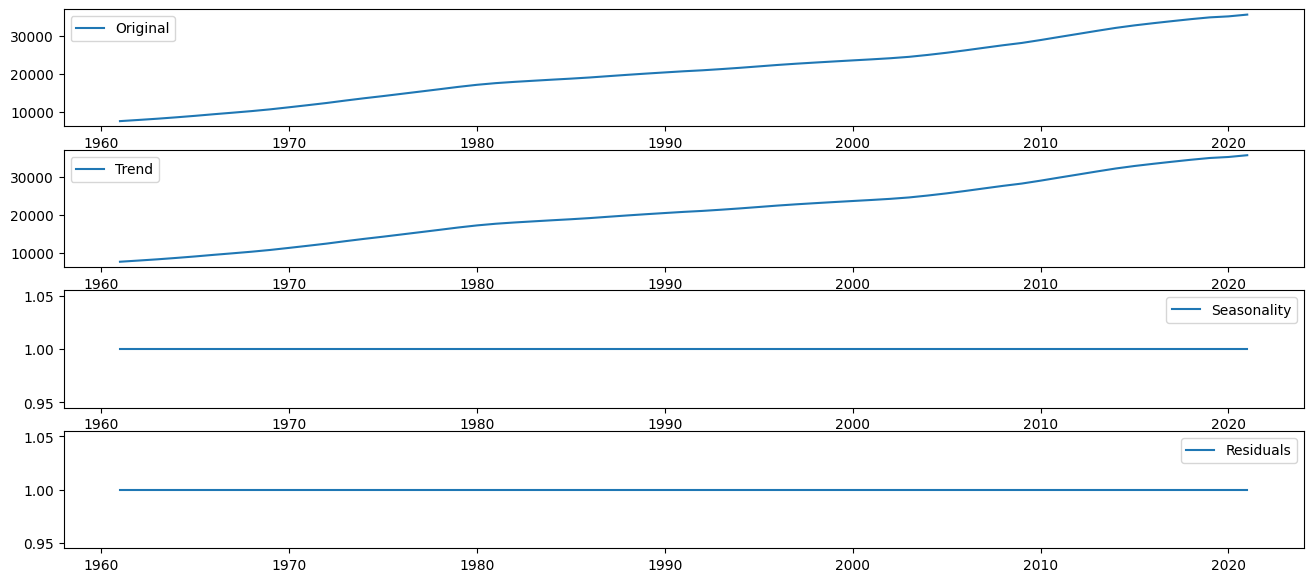

In [46]:

"""**Inference:-Time series is  covariance stationery, the p value is less than 5%**
We Choose the roll 12 as mens to make the data covariance stationery, as the other transformations do not make the data covariance stationery
"""

#visualizing the trend, seasonality and residuals of the time series
decomposition = seasonal_decompose(glob_total_temp2,period=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(glob_total_temp2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

# **ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Year
1961       0.000000
1962    8280.622162
1963    8272.791768
1964    8614.529219
1965    9021.581456
dtype: float64


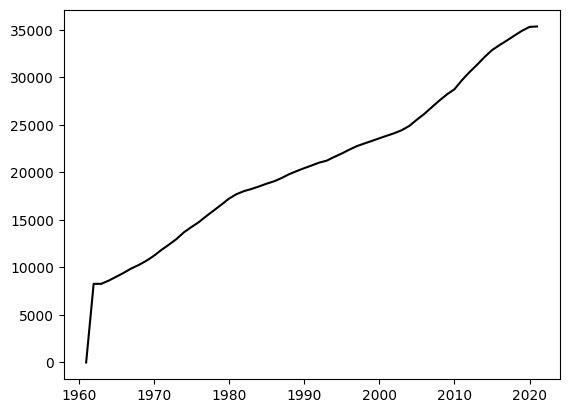

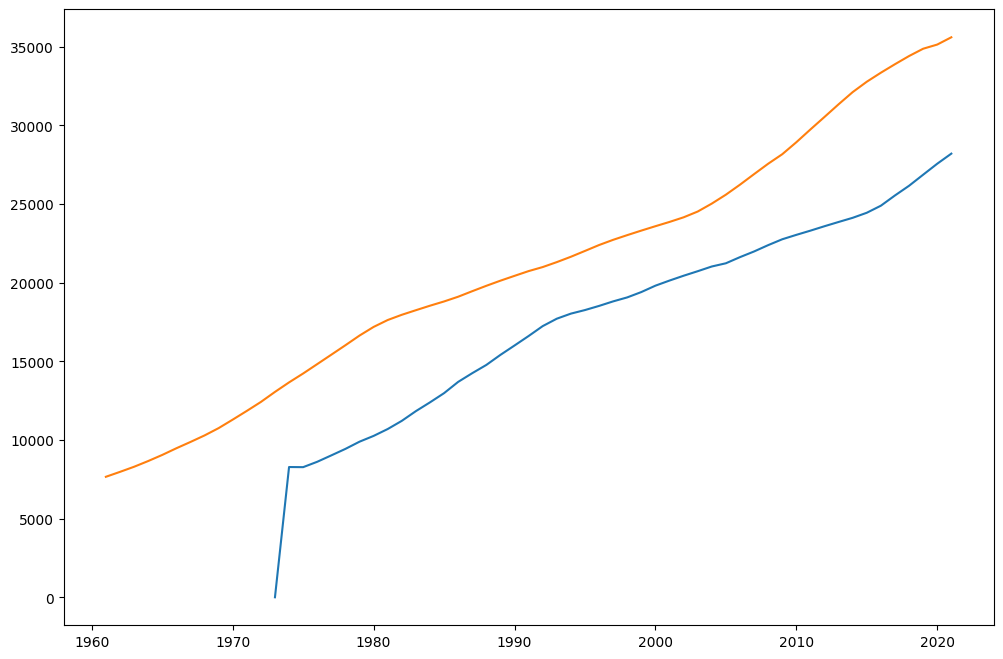

In [47]:


"""**No seasonality and no residuals, original model explained by trend only**"""

#building the model on covariance stationery data
model = ARIMA(glob_total_temp2, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(results_ARIMA.fittedvalues, color='black')

ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

#reversing what we did earlier, i.e shifting by 12 time priods
ARIMA_shifted= ARIMA_diff_predictions.shift(periods=12).dropna()

ARIMA_shifted

#visualizing actual and predicted results
plt.figure(figsize=(12,8))
plt.plot(ARIMA_shifted)
plt.plot(glob_total_temp2)

In [48]:
df_cat= ['Oil_mean','Gas_mean','Total_mean']

# ***Importing Preprocessed Dataset***

In [49]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/preprocessed_dataset.csv'
dataset = pd.read_csv('preprocessed_dataset.csv')
dataset.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Per Capita
0,Afghanistan,AFG,1950,0.084272,0.063204,0.0,0.011266
1,Afghanistan,AFG,1951,0.091600,0.065952,0.0,0.012098
2,Afghanistan,AFG,1952,0.091600,0.059892,0.0,0.011946
3,Afghanistan,AFG,1953,0.106256,0.068307,0.0,0.013685
4,Afghanistan,AFG,1954,0.106256,0.063754,0.0,0.013511


In [50]:
# Summing up the Oil and Gas values for each country and year
dataset['Oil_Gas_Sum'] = dataset['Oil'] + dataset['Gas']
top_countries = dataset.groupby('Country')['Oil_Gas_Sum'].sum().nlargest(10).index.tolist()
top_countries_data = dataset[dataset['Country'].isin(top_countries)]
top_countries_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Per Capita,Oil_Gas_Sum
2448,Canada,CAN,1950,154.133752,52.447743,3.554164,11.215381,56.001907
2449,Canada,CAN,1951,162.678023,60.381360,4.081604,11.549142,64.462964
2450,Canada,CAN,1952,159.408754,63.830544,4.275888,11.004526,68.106432
2451,Canada,CAN,1953,160.608169,69.845239,4.810722,10.777969,74.655961
2452,Canada,CAN,1954,162.967666,75.177952,5.946672,10.635354,81.124624


# ***EDA Of Preprocessed Dataset***

In [51]:
import seaborn as sns

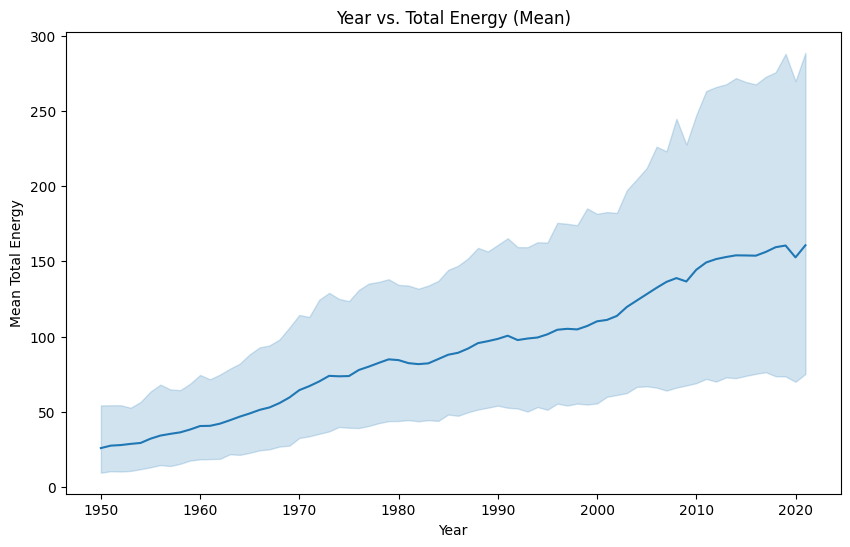

In [52]:
# Year vs. Total Energy Emission
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total', data=dataset, estimator='mean')
plt.title('Year vs. Total Energy (Mean)')
plt.xlabel('Year')
plt.ylabel('Mean Total Energy')
plt.show()

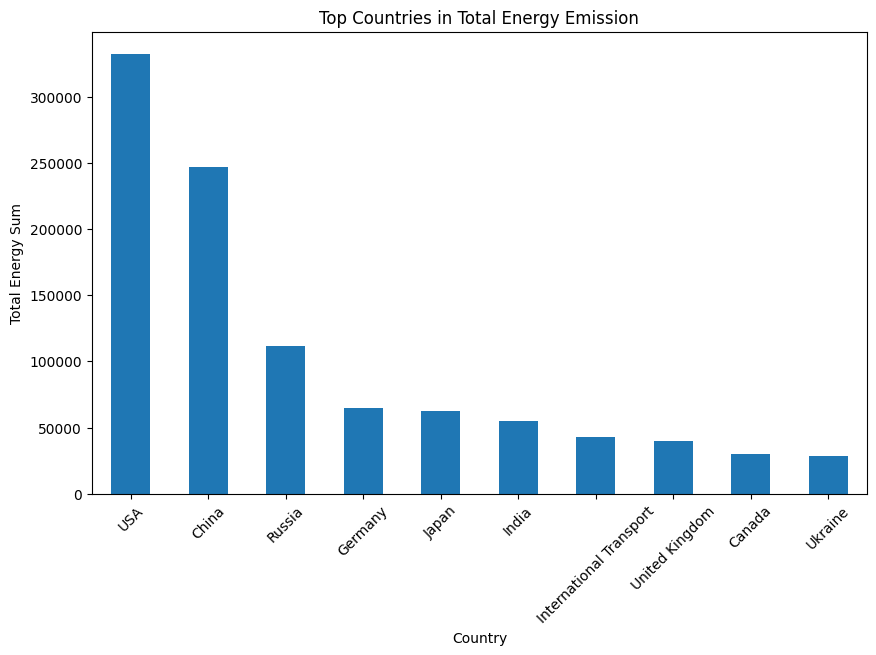

In [54]:
# Identifying top countries in terms of total energy emission
top_countries_energy = dataset.groupby('Country')['Total'].sum().nlargest(10)

# Creating a bar plot for the top countries
plt.figure(figsize=(10, 6))
top_countries_energy.plot(kind='bar')
plt.title('Top Countries in Total Energy Emission')
plt.xlabel('Country')
plt.ylabel('Total Energy Sum')
plt.xticks(rotation=45)
plt.show()

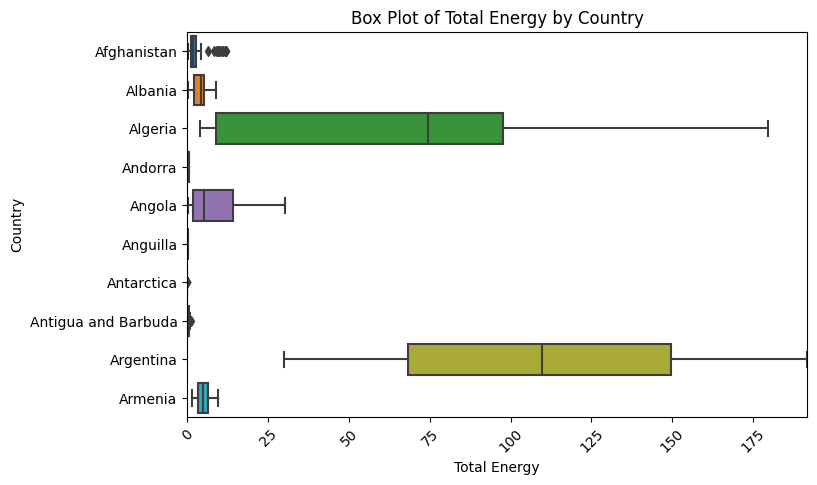

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Total Energy by Country for a subset of countries
subset_countries = dataset['Country'].unique()[:10]  # Selecting the first 10 countries for readability
subset_data = dataset[dataset['Country'].isin(subset_countries)]

plt.figure(figsize=(8, 5))
sns.boxplot(x='Total', y='Country', data=subset_data)  # Swap 'x' and 'y'

# Set the x-axis limits to minimize the range
plt.xlim(0, subset_data['Total'].max())

plt.title('Box Plot of Total Energy by Country')
plt.xlabel('Total Energy')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

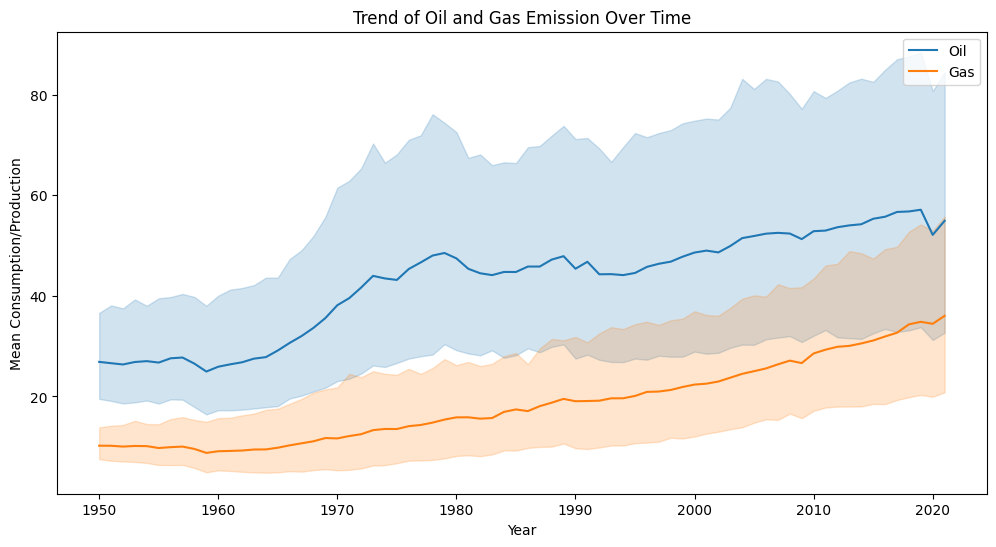

In [57]:
# Trend of Oil and Gas Emsission Over Time

# Plotting Oil trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Oil', data=dataset, estimator='mean', label='Oil')
sns.lineplot(x='Year', y='Gas', data=dataset, estimator='mean', label='Gas')
plt.title('Trend of Oil and Gas Emission Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Emission')
plt.legend()
plt.show()

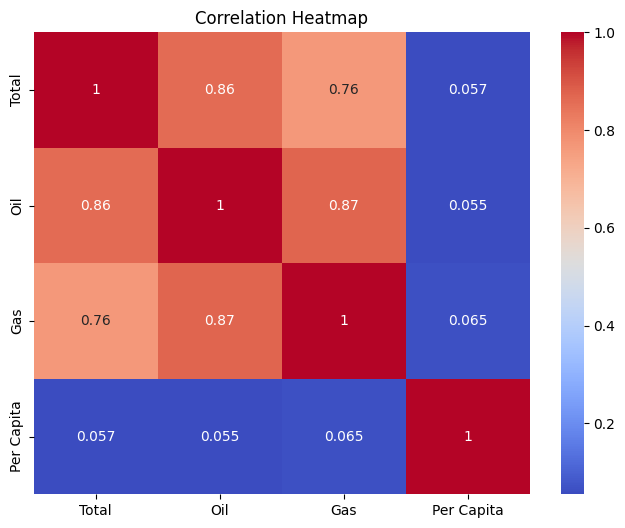

In [58]:
# Correlation Heatmap
correlation_matrix = dataset[['Total', 'Oil', 'Gas', 'Per Capita']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ***Linear Regression***

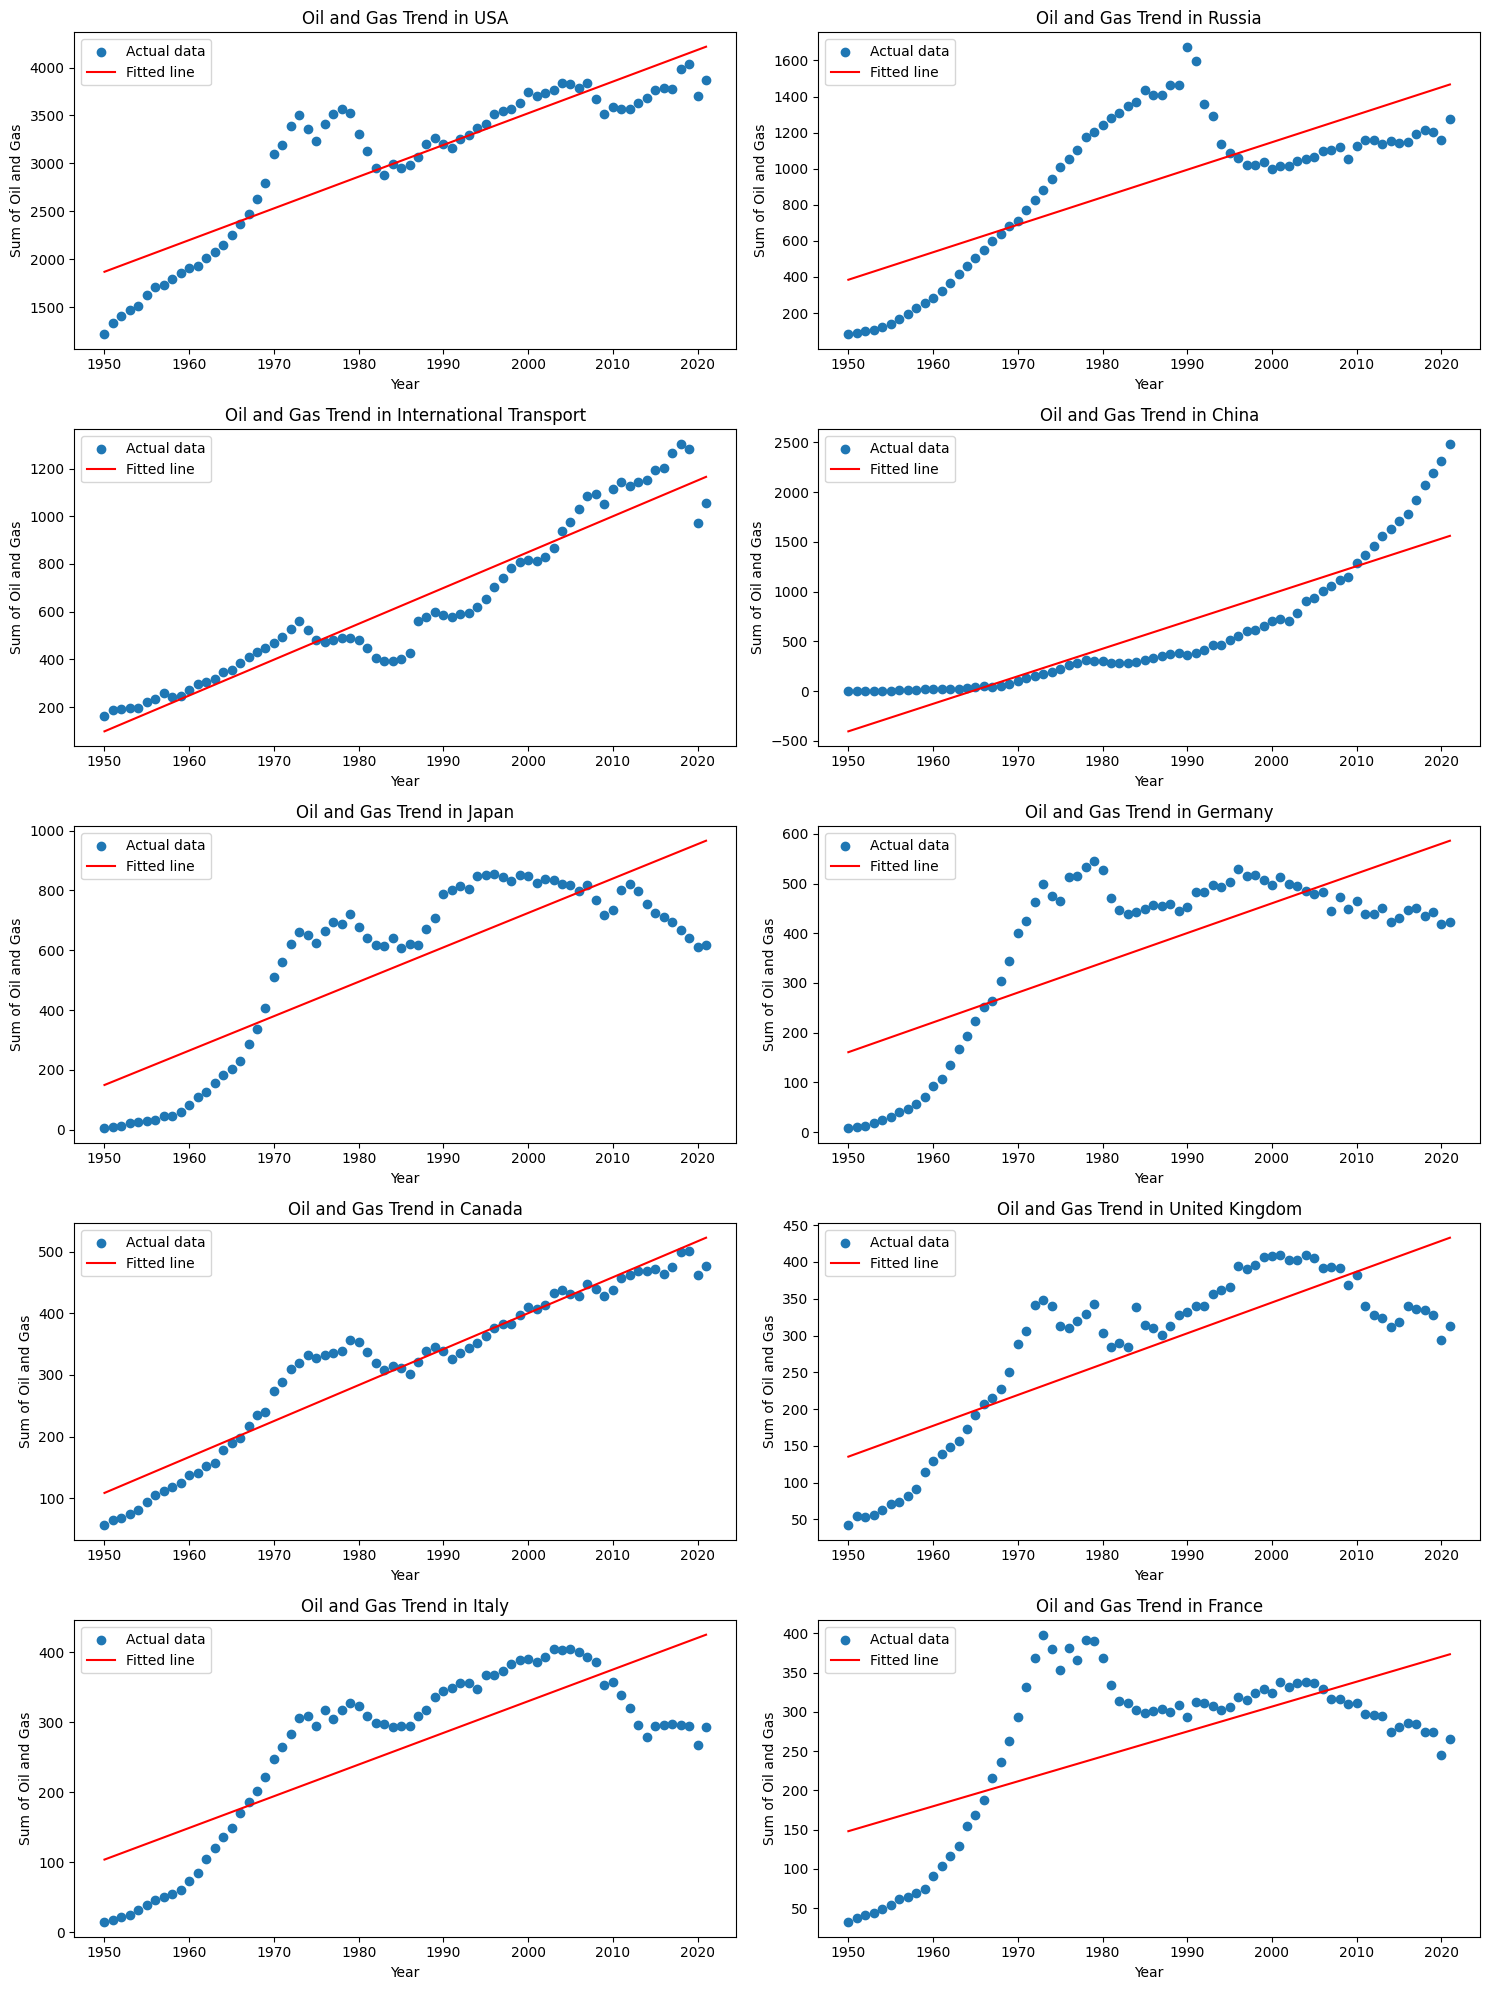

In [59]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Preparing a figure to plot regression results
plt.figure(figsize=(15, 20))

# Loop through each country and perform linear regression
for i, country in enumerate(top_countries, 1):
    # Filter data for the country
    country_data = top_countries_data[top_countries_data['Country'] == country]

    # Linear Regression
    model = LinearRegression()
    X = country_data[['Year']]  # Independent variable
    y = country_data['Oil_Gas_Sum']  # Dependent variable
    model.fit(X, y)

    # Predictions for plotting
    y_pred = model.predict(X)

    # Plotting
    plt.subplot(5, 2, i)
    plt.scatter(X, y, label='Actual data')
    plt.plot(X, y_pred, color='red', label='Fitted line')
    plt.title(f'Oil and Gas Trend in {country}')
    plt.xlabel('Year')
    plt.ylabel('Sum of Oil and Gas')
    plt.legend()

plt.tight_layout()
plt.show()

### **Accuracy Test of Linear Regression**

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Preparing a dictionary to store regression results for each country
regression_results = {}

for country in top_countries:
    # Filter data for the country
    country_data = top_countries_data[top_countries_data['Country'] == country]

    # Linear Regression
    model = LinearRegression()
    X = country_data[['Year']]
    y = country_data['Oil_Gas_Sum']
    model.fit(X, y)

    # Making predictions
    y_pred = model.predict(X)

    # Calculating accuracy metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Storing the results
    regression_results[country] = {'MSE': mse, 'R2': r2}

regression_results

{'USA': {'MSE': 130116.8019349685, 'R2': 0.7840458862909512},
 'Russia': {'MSE': 79261.27583584751, 'R2': 0.5586940122089779},
 'International Transport': {'MSE': 10101.373736750946,
  'R2': 0.9061921423510869},
 'China': {'MSE': 82356.91217732645, 'R2': 0.8007176214126959},
 'Japan': {'MSE': 26483.668044762486, 'R2': 0.683198886311581},
 'Germany': {'MSE': 13153.23447062071, 'R2': 0.5410214497635399},
 'Canada': {'MSE': 1305.1930696949107, 'R2': 0.9183829263345252},
 'United Kingdom': {'MSE': 4133.379850189188, 'R2': 0.6473463071031904},
 'Italy': {'MSE': 5241.86051586988, 'R2': 0.6276839824592344},
 'France': {'MSE': 6577.158027055204, 'R2': 0.3980037120741442}}

# ***Model Building***

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Dictionary to store results for each model and country
model_performance = {}

# Models to evaluate
models = {
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Applying each model to each country
for country in top_countries:
    country_data = top_countries_data[top_countries_data['Country'] == country]
    X = country_data[['Year']]
    y = country_data['Oil_Gas_Sum']

    model_performance[country] = {}

    for model_name, model in models.items():
        # Fit the model
        model.fit(X, y)

        # Make predictions
        y_pred = model.predict(X)

        # Evaluate the model
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Store the results
        model_performance[country][model_name] = {'MSE': mse, 'R2': r2}

model_performance

{'USA': {'Polynomial Regression': {'MSE': 50117.03678133337,
   'R2': 0.916821040027975},
  'Random Forest': {'MSE': 949.0383428623795, 'R2': 0.9984248864776804},
  'SVR': {'MSE': 648937.2498976517, 'R2': -0.0770374507396534},
  'Gradient Boosting': {'MSE': 188.2618622204547, 'R2': 0.999687542861518}},
 'Russia': {'Polynomial Regression': {'MSE': 25699.258505071037,
   'R2': 0.8569132714496642},
  'Random Forest': {'MSE': 237.90079916560592, 'R2': 0.9986754307691251},
  'SVR': {'MSE': 186852.9814637528, 'R2': -0.040348375508549195},
  'Gradient Boosting': {'MSE': 15.392517701315999, 'R2': 0.9999142985000287}},
 'International Transport': {'Polynomial Regression': {'MSE': 6827.202013074515,
   'R2': 0.936598208196892},
  'Random Forest': {'MSE': 183.41140076410343, 'R2': 0.9982967236910095},
  'SVR': {'MSE': 102943.86057678214, 'R2': 0.04399705718418012},
  'Gradient Boosting': {'MSE': 6.52719036569512, 'R2': 0.9999393843094385}},
 'China': {'Polynomial Regression': {'MSE': 2570.7214196

# ***Comparison Model***

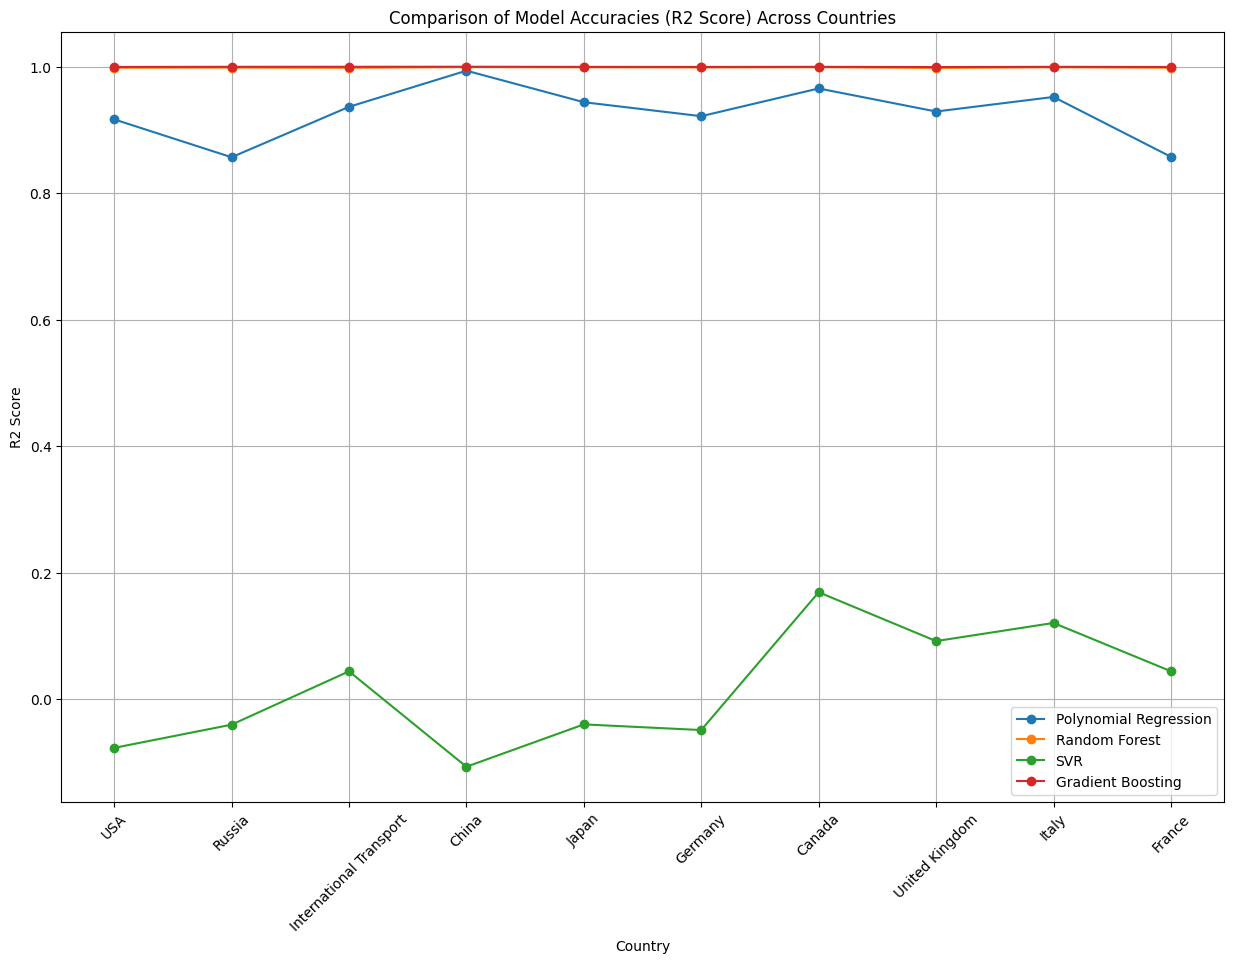

{'USA': {'Polynomial Regression': {'MSE': 50117.03678133337,
   'R2': 0.916821040027975},
  'Random Forest': {'MSE': 949.0383428623795, 'R2': 0.9984248864776804},
  'SVR': {'MSE': 648937.2498976517, 'R2': -0.0770374507396534},
  'Gradient Boosting': {'MSE': 188.2618622204547, 'R2': 0.999687542861518}},
 'Russia': {'Polynomial Regression': {'MSE': 25699.258505071037,
   'R2': 0.8569132714496642},
  'Random Forest': {'MSE': 237.90079916560592, 'R2': 0.9986754307691251},
  'SVR': {'MSE': 186852.9814637528, 'R2': -0.040348375508549195},
  'Gradient Boosting': {'MSE': 15.392517701315999, 'R2': 0.9999142985000287}},
 'International Transport': {'Polynomial Regression': {'MSE': 6827.202013074515,
   'R2': 0.936598208196892},
  'Random Forest': {'MSE': 183.41140076410343, 'R2': 0.9982967236910095},
  'SVR': {'MSE': 102943.86057678214, 'R2': 0.04399705718418012},
  'Gradient Boosting': {'MSE': 6.52719036569512, 'R2': 0.9999393843094385}},
 'China': {'Polynomial Regression': {'MSE': 2570.7214196

In [62]:
# Creating a comparison graph of the model performances for each country

# Preparing the data for plotting
countries = list(model_performance.keys())
model_names = list(models.keys())
r2_scores = {model: [] for model in model_names}

# Extracting R2 scores for each model and country
for country in countries:
    for model in model_names:
        r2_scores[model].append(model_performance[country][model]['R2'])

# Plotting
plt.figure(figsize=(15, 10))
for model in model_names:
    plt.plot(countries, r2_scores[model], marker='o', label=model)

plt.title('Comparison of Model Accuracies (R2 Score) Across Countries')
plt.xlabel('Country')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Displaying the model performance results
model_performance